In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
df= pd.read_csv("../data/CleanedAirQuality.csv")#, parse_dates=['Date'])
df['Date'].nunique()

391

## Removing Outliers and other anomalous data

In [106]:
# removing values equaling to -200 in 'NMHC(GT)' column, that might with identifying outliers
df = df[df['NMHC(GT)']>-200]

# Creating a function for identifying outliers and removing the said outliers

def outliers(data,cols):
    for col in cols:
        q1 = np.quantile(data[col],0.25)
        q3 = np.quantile(data[col],0.75)
        iqr = q3-q1
        lb = q1 - 1.5*iqr
        ub = q3 + 1.5*iqr
        data = data[(data[col]>=lb)&(data[col]<=ub)]
    return data

# Creating a list of columns for checking outliers
cols_outl = ['PT08.S1(CO)', 'PT08.S3(NOx)',  'PT08.S4(NO2)', 'PT08.S5(O3)', 'PT08.S2(NMHC)',
             'CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']
df_out = outliers(df,cols_outl)

## Correalate sensor data with actual pollutant levels

In [5]:
# Creating list of column names corresponding to their categories for later use.

sensor_cols = ['PT08.S1(CO)', 'PT08.S3(NOx)',  'PT08.S4(NO2)', 'PT08.S2(NMHC)']
pollutant_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'NMHC(GT)']
weather_cols = ['T', 'RH', 'AH']

In [108]:
# Creating a dictionary of sensors as keys and values as their pollutant
# This can be used to create scatter plots

sen_poll = {sensor_cols[x]:pollutant_cols[x] for x in range(len(sensor_cols))}
sen_poll

{'PT08.S1(CO)': 'CO(GT)',
 'PT08.S3(NOx)': 'NOx(GT)',
 'PT08.S4(NO2)': 'NO2(GT)',
 'PT08.S2(NMHC)': 'NMHC(GT)'}

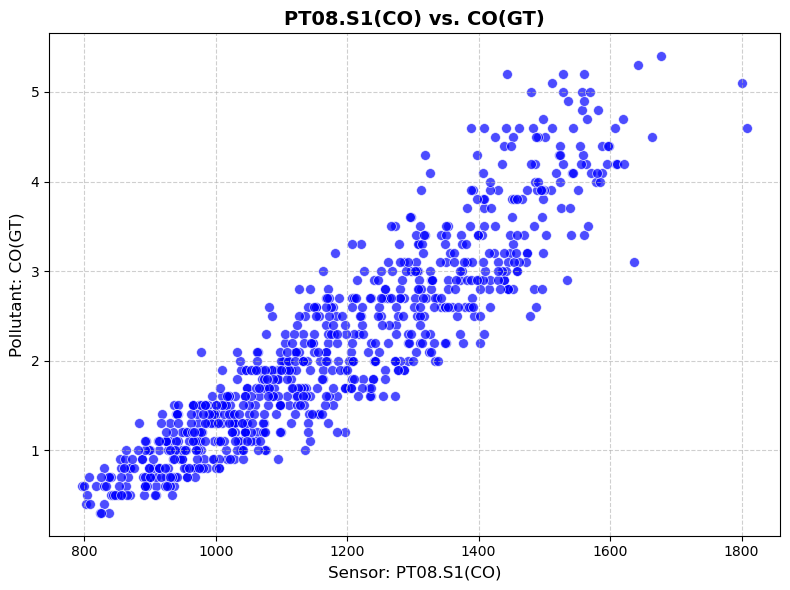

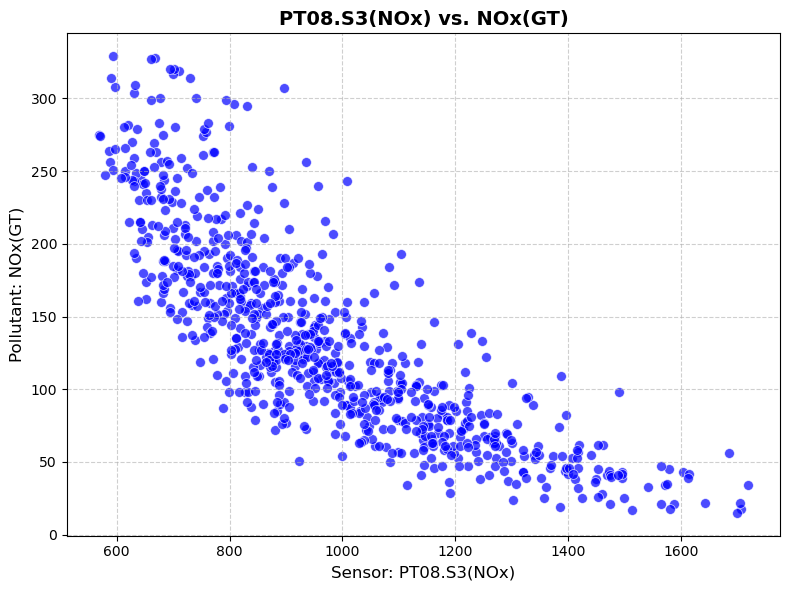

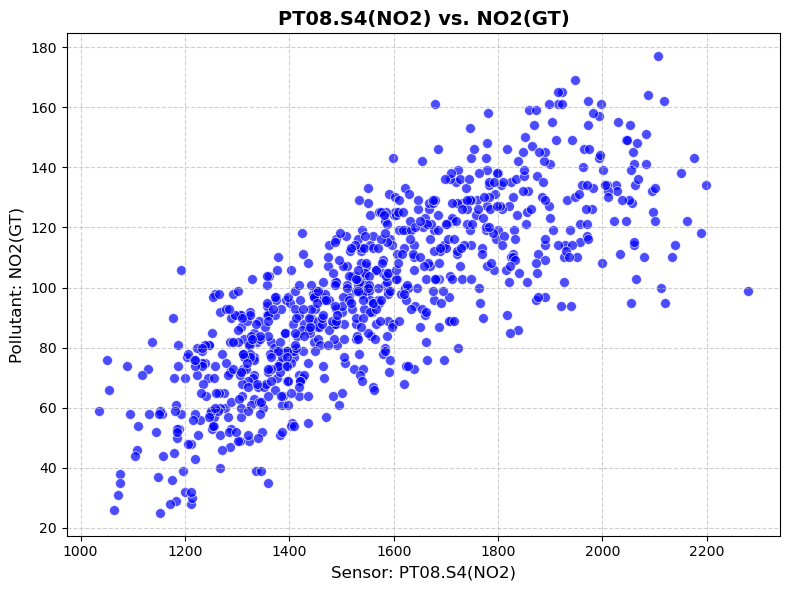

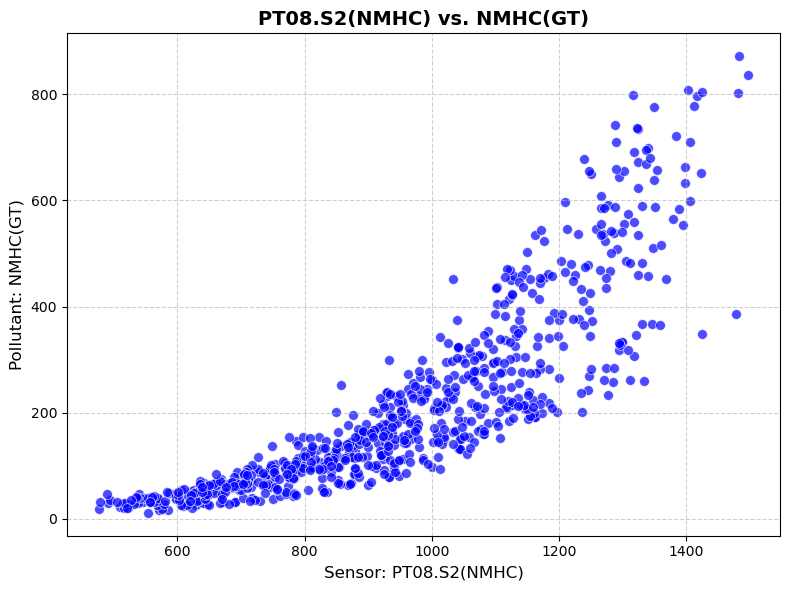

In [109]:
# Iterate through the sensor-pollutant dictionary

for sensor, pollutant in sen_poll.items():

    plt.figure(figsize=(8,6))

    sns.scatterplot(x=df_out[sensor],
                    y=df_out[pollutant],
                    alpha=0.7,
                    s=50,
                    color='blue')
    
    plt.title(f'{sensor} vs. {pollutant}', fontsize=14, fontweight='bold')
    plt.xlabel(f'Sensor: {sensor}', fontsize=12)
    plt.ylabel(f'Pollutant: {pollutant}', fontsize=12)

    plt.tight_layout()
    plt.grid(linestyle='--', alpha=0.6)
    plt.show()

## Relationship between pollutants and weather

In [110]:
for col in weather_cols:
    for pollutant in pollutant_cols:
        corr = df_out[pollutant].corr(df_out[col])
        print(f'The Pearsons correlation coefficient between {pollutant} and {col}: {corr:.2f}')
        print(f'The correlation is positive\n' 
              if corr > 0 else f'The correlation is negative\n')


The Pearsons correlation coefficient between CO(GT) and T: 0.34
The correlation is positive

The Pearsons correlation coefficient between NOx(GT) and T: 0.24
The correlation is positive

The Pearsons correlation coefficient between NO2(GT) and T: 0.38
The correlation is positive

The Pearsons correlation coefficient between NMHC(GT) and T: 0.37
The correlation is positive

The Pearsons correlation coefficient between CO(GT) and RH: -0.15
The correlation is negative

The Pearsons correlation coefficient between NOx(GT) and RH: -0.06
The correlation is negative

The Pearsons correlation coefficient between NO2(GT) and RH: -0.23
The correlation is negative

The Pearsons correlation coefficient between NMHC(GT) and RH: -0.20
The correlation is negative

The Pearsons correlation coefficient between CO(GT) and AH: 0.25
The correlation is positive

The Pearsons correlation coefficient between NOx(GT) and AH: 0.23
The correlation is positive

The Pearsons correlation coefficient between NO2(GT

### Heatmap showcasing the realtionship between pollutants and climate

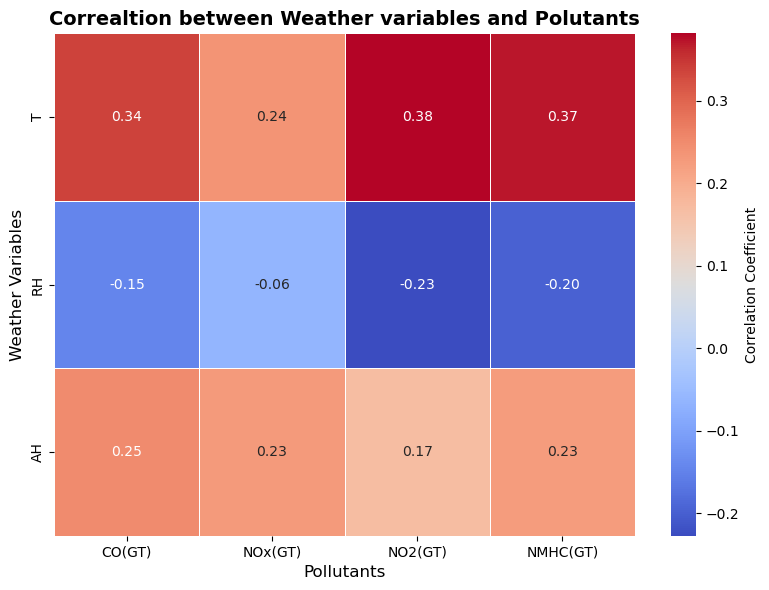

In [185]:
weather_pollut = df_out[pollutant_cols+weather_cols]
weather_pollut_corr = weather_pollut.corr()

plt.figure(figsize=(8,6))

sns.heatmap(weather_pollut_corr.loc[weather_cols,pollutant_cols],
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correaltion between Weather variables and Polutants', fontsize=14, fontweight='bold')
plt.xlabel('Pollutants', fontsize=12)
plt.ylabel('Weather Variables', fontsize=12)

plt.tight_layout()
plt.show()

## Correaltion for all Numerical data

In [112]:
# removing Date and Time Column

correlation_data = df[sensor_cols+pollutant_cols+weather_cols]
correlation_data.head()

,PT08.S1(CO),PT08.S3(NOx),PT08.S4(NO2),PT08.S2(NMHC),CO(GT),NOx(GT),NO2(GT),NMHC(GT),T,RH,AH
0,1360.0,1056.0,1692.0,1046.0,2.6,166.0,113.0,150.0,13.6,48.9,0.7578
1,1292.0,1174.0,1559.0,955.0,2.0,103.0,92.0,112.0,13.3,47.7,0.7255
2,1402.0,1140.0,1555.0,939.0,2.2,131.0,114.0,88.0,11.9,54.0,0.7502
3,1376.0,1092.0,1584.0,948.0,2.2,172.0,122.0,80.0,11.0,60.0,0.7867
4,1272.0,1205.0,1490.0,836.0,1.6,131.0,116.0,51.0,11.2,59.6,0.7888


In [113]:
# Calculate the correlation matrix
correlation = correlation_data.corr()


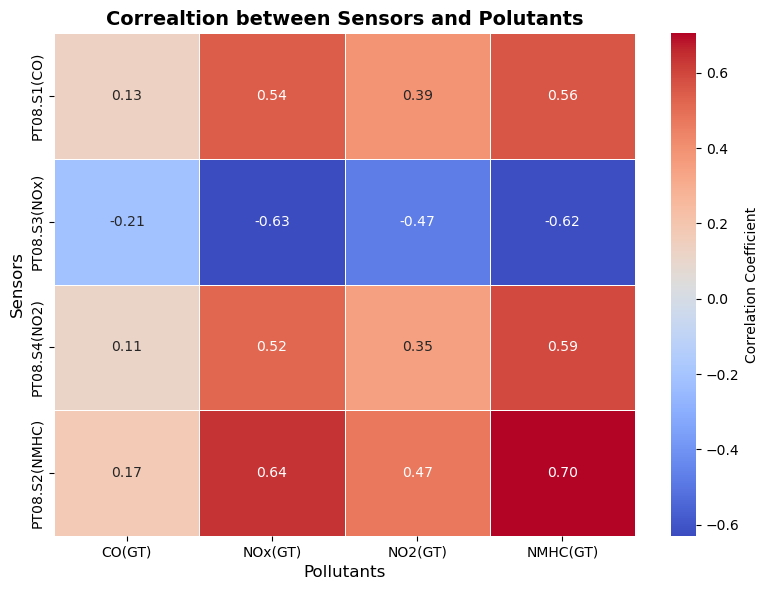

In [186]:
sensor_pollutant_corr = correlation.loc[sensor_cols, pollutant_cols]

plt.figure(figsize=(8,6))

sns.heatmap(sensor_pollutant_corr,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correaltion between Sensors and Polutants', fontsize=14, fontweight='bold')
plt.xlabel('Pollutants', fontsize=12)
plt.ylabel('Sensors', fontsize=12)

plt.tight_layout()
plt.show()

## Identify peak pollution periods (hourly, daily and monthly trends).

### Hourly trends

In [150]:
# Converting the time column in datetime

df_out['Time']= pd.to_datetime(df_out['Time'],format='%H:%M:%S', errors='coerce').dt.time

# taking out hour from the time
df_out['Hour']= df_out['Time'].apply(lambda x: x.hour)

<Figure size 1500x800 with 0 Axes>

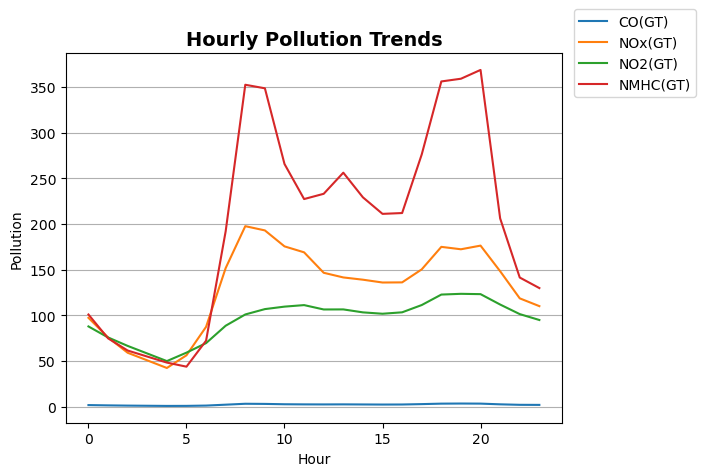

In [181]:
plt.figure(figsize=(15,8))

df_out.groupby('Hour')[pollutant_cols].mean().plot(kind='line')
plt.title('Hourly Pollution Trends', fontsize=14, fontweight='bold')
plt.ylabel('Pollution')
plt.legend(bbox_to_anchor=(1.01,1), loc='center left')
plt.xticks(rotation=0)

plt.grid(axis='y')
plt.show()

### Daily Trends

In [162]:
# Extracting the Day from date

df_out['Day'] = df_out['Date'].dt.day_name()
df_out['Day'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

<Figure size 1500x800 with 0 Axes>

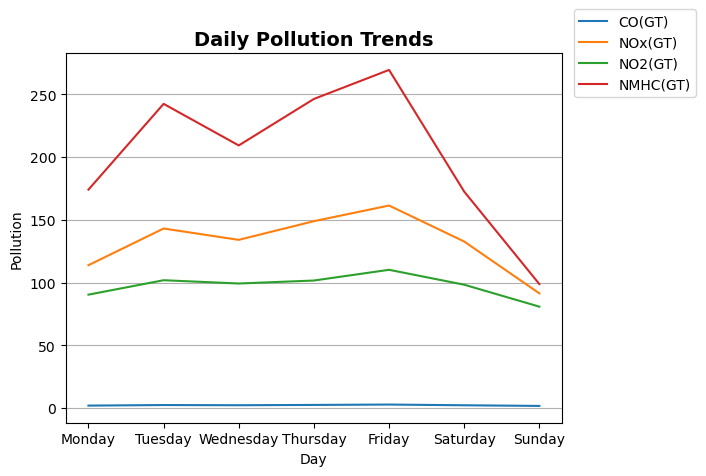

In [182]:
daily_trends = df_out.groupby('Day')[pollutant_cols].mean()
daily_trends = daily_trends.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(15,8))

daily_trends.plot(kind='line')
plt.title('Daily Pollution Trends', fontsize=14, fontweight='bold')
plt.ylabel('Pollution')
plt.legend(bbox_to_anchor=(1.01,1), loc='center left')
plt.xticks(rotation=0)

plt.grid(axis='y')
plt.show()

### Monthly Trends

In [170]:
df_out['Month'] = df_out['Date'].dt.month_name()
df_out['Month'].unique()

array(['March', 'April', 'May'], dtype=object)

<Figure size 1500x800 with 0 Axes>

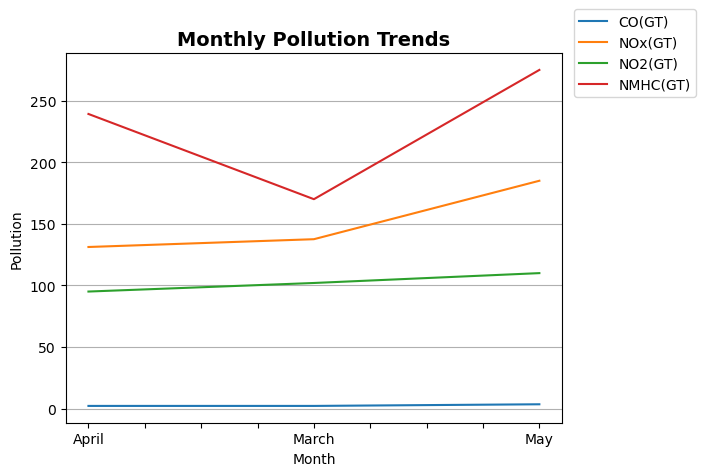

In [183]:
plt.figure(figsize=(15,8))

df_out.groupby('Month')[pollutant_cols].mean().plot(kind='line')
plt.title('Monthly Pollution Trends', fontsize=14, fontweight='bold')
plt.ylabel('Pollution')
plt.legend(bbox_to_anchor=(1.01,1), loc='center left')
plt.xticks(rotation=0)

plt.grid(axis='y')
plt.show()

## Comparing pollutant levels during weekdays vs. weekends

In [117]:
# Creating a column 'Day Type'

df_out['Day Type']=df_out['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x>=5 else 'Weekday')
df_out.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day Type
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Weekday
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Weekday
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Weekday
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Weekday
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Weekday


<Figure size 1500x800 with 0 Axes>

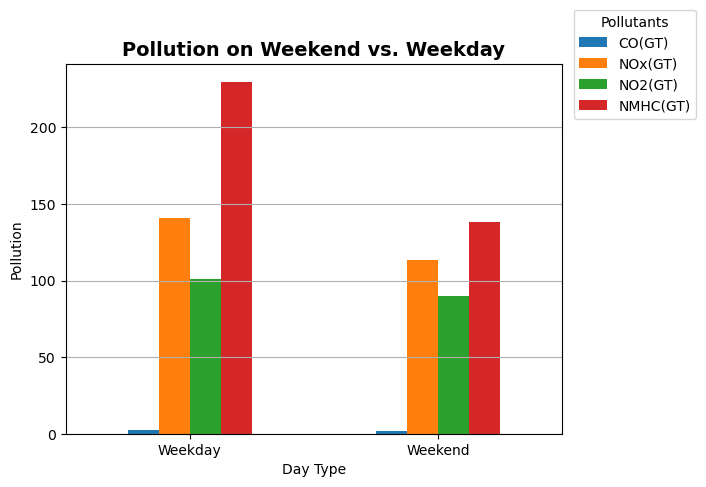

In [187]:
plt.figure(figsize=(15,8))

df_out.groupby('Day Type')[pollutant_cols].mean().plot(kind='bar')
plt.title('Pollution on Weekend vs. Weekday', fontsize=14, fontweight='bold')
plt.ylabel('Pollution')
plt.legend(title='Pollutants',bbox_to_anchor=(1.01,1), loc='center left')
plt.xticks(rotation=0)

plt.grid(axis='y')
plt.show()



## Periods of significant spikes

In [180]:
# Normally spikes can be considered an outlier So, we will use the dataframe with outliers.

def spikes(data,cols):

    data = data.copy()
    spike_mask=pd.Series(False, index=data.index)

    for col in cols:
        q1 = np.quantile(data[col],0.25)
        q3 = np.quantile(data[col],0.75)
        iqr = q3-q1
        ub = q3 + 1.5*iqr
        spike_mask = spike_mask | (data[col]>ub)
    return data[spike_mask]

spike_df= spikes(df, pollutant_cols)
spike_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
25,2004-03-11,19:00:00,6.9,1776.0,461.0,27.4,1488.0,383.0,702.0,172.0,2333.0,1704.0,9.7,69.3,0.8319
26,2004-03-11,20:00:00,6.1,1640.0,401.0,24.0,1404.0,351.0,743.0,165.0,2191.0,1654.0,9.6,67.8,0.8133
50,2004-03-12,20:00:00,6.6,1843.0,488.0,32.6,1610.0,340.0,624.0,170.0,2390.0,1887.0,12.9,50.5,0.7478
98,2004-03-14,20:00:00,5.9,1898.0,341.0,23.1,1381.0,325.0,681.0,173.0,2103.0,1905.0,17.6,46.1,0.9210
110,2004-03-15,08:00:00,5.5,1797.0,336.0,25.9,1451.0,360.0,652.0,114.0,2323.0,1680.0,12.4,63.9,0.9170


In [188]:
# Spiked data can be used to indicate the peak in a trend graph